# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'ex2data1.txt' #该数据集手动梯度下降跑不出来
data = pd.read_csv(path, header=None, names=['exam1', 'exam2', 'admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


数据可视化

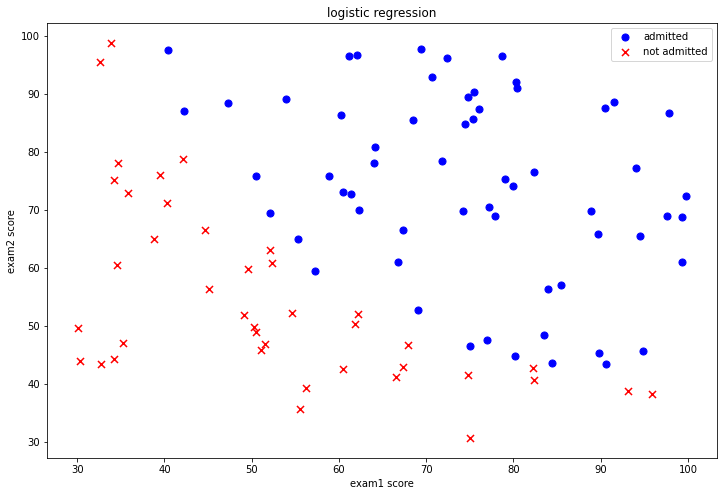

In [3]:
positive = data[data['admitted'].isin([1])]
negative = data[data['admitted'].isin([0])]
plt.figure(figsize=(12,8))
plt.scatter(positive['exam1'], positive['exam2'], s=50, c='b', marker='o', label='admitted')
plt.scatter(negative['exam1'], negative['exam2'], s=50, c='r', marker='x', label='not admitted')
plt.legend()
plt.xlabel('exam1 score')
plt.ylabel('exam2 score')
plt.title('logistic regression')
plt.show()

## sigmoid 函数
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： \\[g\left( z \right)=\frac{1}{1+{{e}^{-z}}}\\] 
合起来，我们得到逻辑回归模型的假设函数： 
	\\[{{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}\\] 

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

代价函数：
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}$$

In [5]:
def computeCost(theta, X, y):
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    #return np.array(np.sum(first - second) / (len(X)))
    return np.sum(first - second) / (len(X))

In [6]:
data.insert(0, 'ones', 1)

In [7]:
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]
X = np.matrix(X.values)
y = np.matrix(y.values)
#theta = np.matrix(np.zeros(cols-1))
theta = np.asmatrix([[-100, 1, 1]]) #初始参数只有设成这样，才能训练成功！

## 手动梯度下降
吴恩达课程给出来的数据集因为是给优化跑的，普通的梯度下降跑不出来，除非初始值设[-100,1,1]  
代价函数的梯度$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

In [8]:
def gradientDescent(theta, X, y, alpha, iters):
    parameters = theta.shape[1]
    cost = np.zeros(iters) #代价曲线
    temp = np.matrix(np.zeros(theta.shape))
    
    for i in range(iters):
        error = sigmoid(X*theta.T)-y
        
        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = theta[0, j] - alpha*np.sum(term)/len(X)
        theta = temp
        cost[i] = computeCost(theta, X, y)
    return theta, cost

In [9]:
alpha = 0.01 #学习率
iters = 1000 #迭代次数

In [10]:
w, cost = gradientDescent(theta, X, y,alpha, iters)
w

D:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


matrix([[-99.9658808 ,   0.81181063,   0.7997827 ]])

In [11]:
computeCost(w, X, y)

D:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


nan

预测可视化

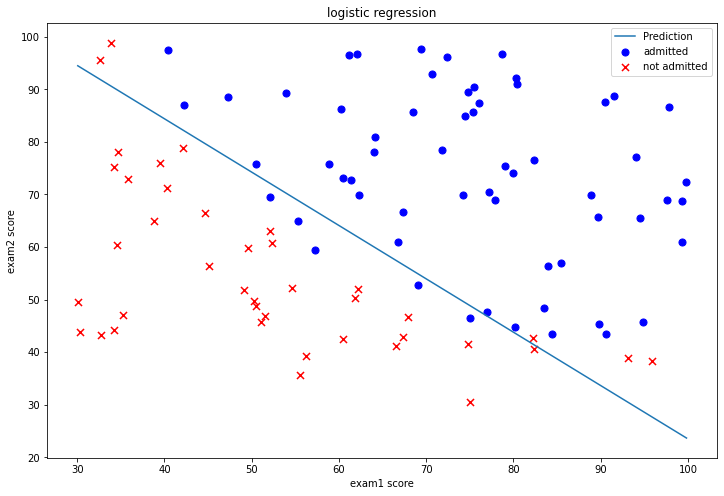

In [12]:
x = np.linspace(X[:, 1].min(), X[:, 1].max(), 1000)
f = -w[0, 0] / w[0, 2] - w[0, 1] / w[0, 2] * x

plt.figure(figsize=(12,8))
plt.scatter(positive['exam1'], positive['exam2'], s=50, c='b', marker='o', label='admitted')
plt.scatter(negative['exam1'], negative['exam2'], s=50, c='r', marker='x', label='not admitted')
plt.legend()
plt.xlabel('exam1 score')
plt.ylabel('exam2 score')
plt.title('logistic regression')
plt.plot(x, f, label='Prediction')  # 画出最后所得的模型
plt.legend()
plt.show()

## 采用高级优化算法

In [13]:
import scipy.optimize as opt

In [14]:
theta = np.zeros(cols-1)
X = data.iloc[:, 0:cols-1].values
y = data.iloc[:, cols-1:cols].values

梯度函数

In [15]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad
#代价函数
def cCost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    #return np.array(np.sum(first - second) / (len(X)))
    return np.sum(first - second) / (len(X))

In [16]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

现在可以用SciPy's truncated newton（TNC）实现寻找最优参数。  
参数theta, X, y是数组形式

In [17]:
finalTheta = opt.fmin_tnc(func=cCost, x0=theta, fprime=gradient, args=(X, y))
finalTheta

(array([-25.16131872,   0.20623159,   0.20147149]), 36, 0)

In [18]:
cCost(finalTheta[0], X, y)

0.20349770158947425

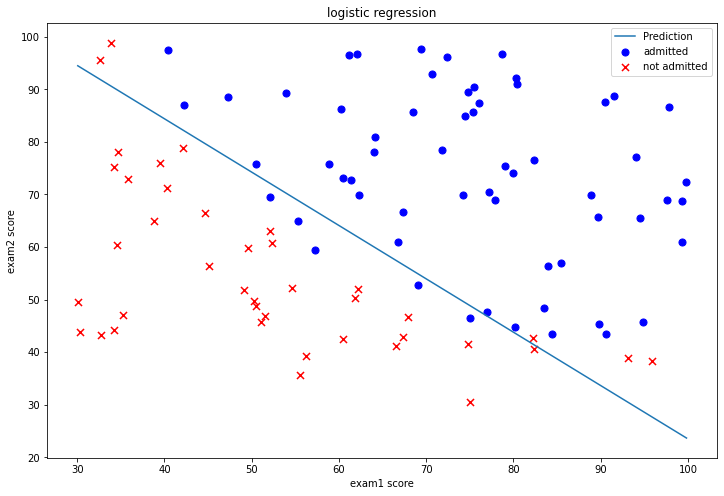

In [19]:
x = np.linspace(X[:, 1].min(), X[:, 1].max(), 1000)
f = -w[0, 0] / w[0, 2] - w[0, 1] / w[0, 2] * x

plt.figure(figsize=(12,8))
plt.scatter(positive['exam1'], positive['exam2'], s=50, c='b', marker='o', label='admitted')
plt.scatter(negative['exam1'], negative['exam2'], s=50, c='r', marker='x', label='not admitted')
plt.legend()
plt.xlabel('exam1 score')
plt.ylabel('exam2 score')
plt.title('logistic regression')
plt.plot(x, f, label='Prediction')  # 画出最后所得的模型
plt.legend()
plt.show()